**Prediction model for profit of 50_startups**

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import boxplot

import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
## Read csv file
df_startups = pd.read_csv('/content/50_Startups.csv') ##, usecols=['R&D Spend', 'Administration'])
df_startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df_startups.shape

(50, 5)

In [4]:
df_startups.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [5]:
df_startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
df_startups.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
df_startups[df_startups.duplicated()]

,R&D Spend,Administration,Marketing Spend,State,Profit


In [8]:
df_startups['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

Observations: State is a categorical variable. Need transformation to numeric variables.

No nulls exist.

No duplicates exist.

Columns R&D Spend and Marketing Spend needs to be renamed for MLR creation.

In [9]:
df_startups_cleaned = pd.get_dummies(df_startups)
df_startups_cleaned.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [10]:
# Rename columns and fill space in column name by underscore
df_startups_cleaned.rename(columns={'R&D Spend': 'RD_Spend', 'Marketing Spend':'Marketing_Spend', 'State_New York': 'State_NewYork'}, inplace=True)
df_startups_cleaned.head()

,RD_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_NewYork
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


**Outlier Detection and Imputations**

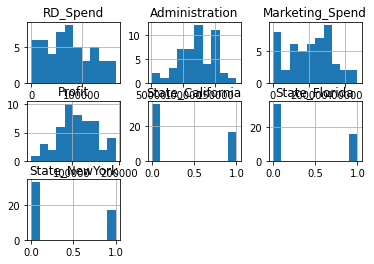

In [11]:
#plt.figure(figsize=(10,5))
df_startups_cleaned.hist()
plt.show()

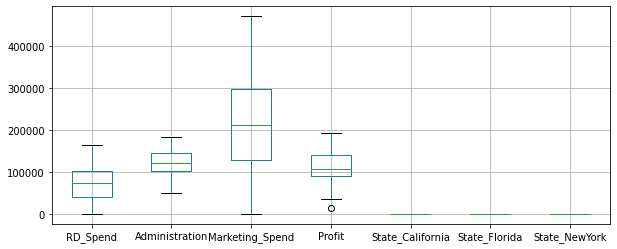

In [12]:
plt.figure(figsize=(10,4))
df_startups_cleaned.boxplot()

R&D Spend and Marketing spend data is not normalized. So, transformations need to be applied and models performance to be compared to select best model.

No outliers exists in input variables.

**Check Correlation and collinearity**

In [13]:
# Check for correlation
# No collinearity since none of correlation between featues is near to 1.0
df_startups_cleaned.corr()

,RD_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_NewYork
RD_Spend,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
State_NewYork,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


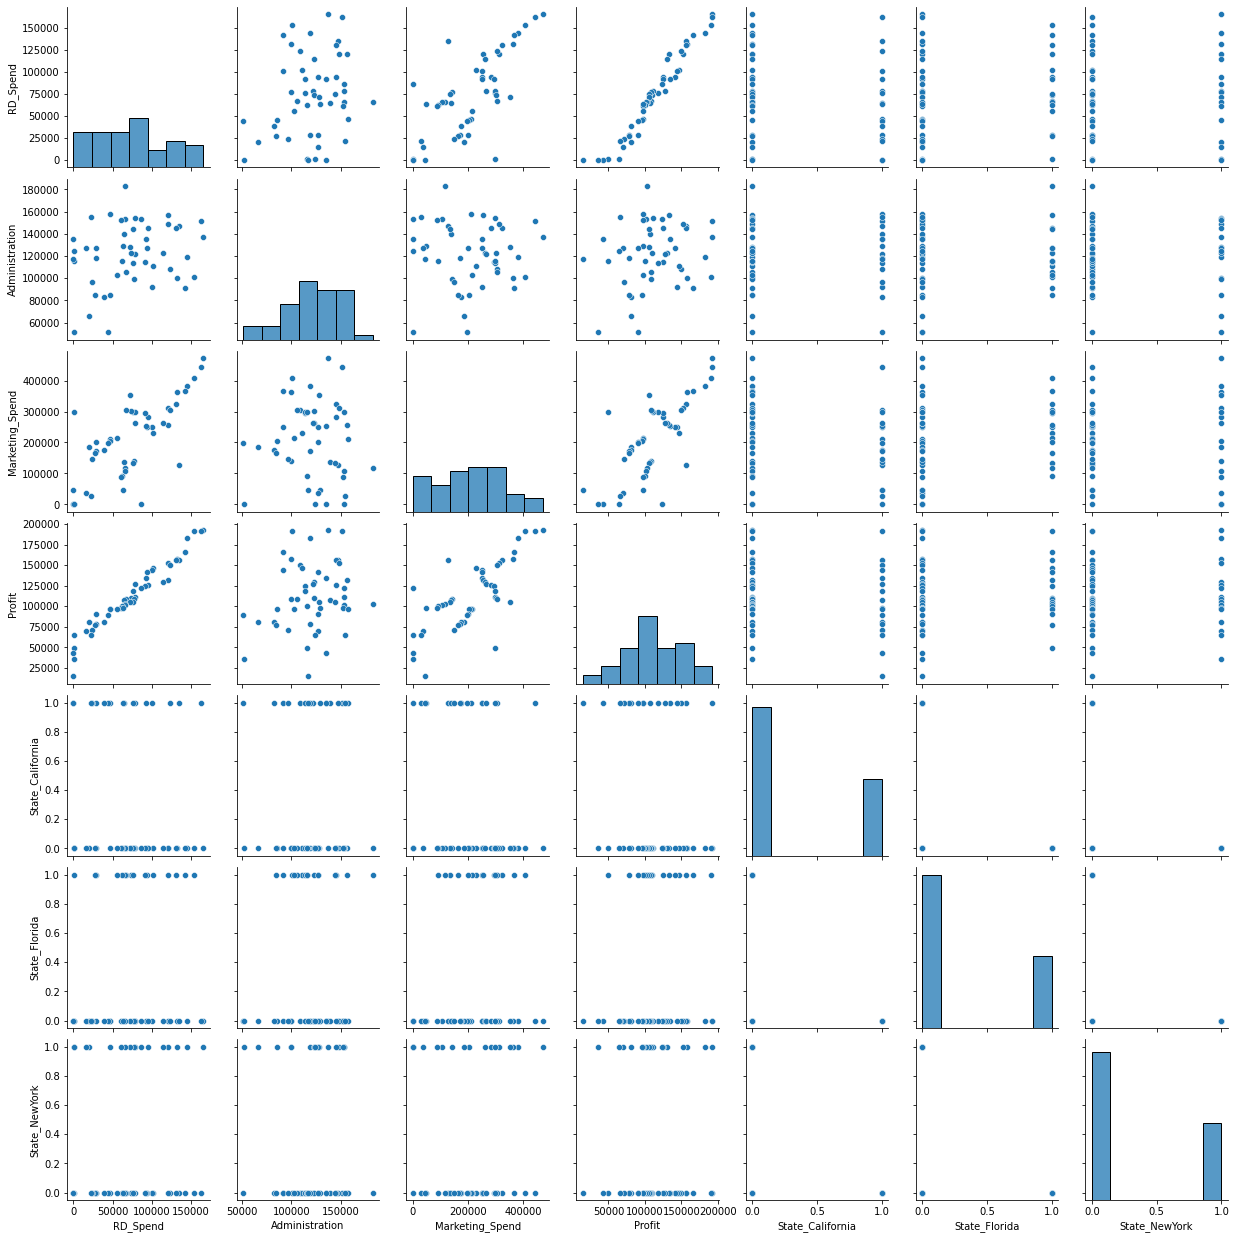

In [14]:
# Pair plot, Observe the relations only in input features R&D Spend, Administration, Marketing Spend
sns.pairplot(df_startups_cleaned)

No Collinearity exists between input variables.

##MLR with Actual Data

In [15]:
model_startups_act = smf.ols('Profit~RD_Spend+ Administration+Marketing_Spend+State_California+State_Florida+State_NewYork', data=df_startups_cleaned).fit()

In [17]:
# Coefficients
model_startups_act.params

Intercept           37633.233317
RD_Spend                0.806023
Administration         -0.027004
Marketing_Spend         0.026980
State_California    12492.110514
State_Florida       12690.899307
State_NewYork       12450.223495
dtype: float64

In [18]:
model_startups_act.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Wed, 03 Aug 2022   Prob (F-statistic):           1.34e-27
Time:                        14:06:39   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.763e+04   5073.636      7.417      0.000    2.74e+04    4.79e+04
RD_Spend             0.8060      0.046     17.369      0.000       0.712       0.900
Administration      -0.0270      0.052     -0.517      0.608      -0.132       0.078
Marketing_Spend      0.0270      0.017      1.574      0.123      -0.008       0.062
State_California  1.249e+04   2449.797      5.099      0.000    7554.868    1.74e+04
State_Florida     1.269e+04   2726.700      4.654      0.000    7195.596    1.82e+04
State_NewYork     1.245e+04   2486.364      5.007      0.000    7439.285    1.75e+04
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     3.48e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.2e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Conclusion: R-Squared and Adj. R-squared are good values which are 0.951 and 0.945 which are near to 95%. So, good.

However, p-value of Administration column is 0.608 and Maketing_Spend is 0.123, which are above 0.05 (95% Confidence Interval). So, features need to be transformed and models need to be compared for best suitable model.

**Prediction for new values**

In [19]:
# New Data creation.... Takes first 5 rows of train data for prediction
df_act_newdata = pd.DataFrame()
df_act_newdata['RD_Spend'] = df_startups_cleaned['RD_Spend'].iloc[0:5]
df_act_newdata['Administration'] = df_startups_cleaned['Administration'].iloc[0:5]
df_act_newdata['Marketing_Spend'] = df_startups_cleaned['Marketing_Spend'].iloc[0:5]
df_act_newdata['State_California'] = df_startups_cleaned['State_California'].iloc[0:5]
df_act_newdata['State_Florida'] = df_startups_cleaned['State_Florida'].iloc[0:5]
df_act_newdata['State_NewYork'] = df_startups_cleaned['State_NewYork'].iloc[0:5]


In [20]:
df_act_newdata

,RD_Spend,Administration,Marketing_Spend,State_California,State_Florida,State_NewYork
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0


In [21]:
# Predicting for first 5 rows of given data for validation
model_startups_act.predict(df_act_newdata)

0    192390.571365
1    189071.320106
2    182276.186735
3    173584.976191
4    172277.133819
dtype: float64

#MLR with Normalization

In [22]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
names = df_startups_cleaned.columns
d = scaler.fit_transform(df_startups_cleaned)
df_startups_norm = pd.DataFrame(d, columns=names)
df_startups_norm.head()

,RD_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_NewYork
0,1.000000,0.651744,1.000000,1.000000,0.0,0.0,1.0
1,0.983359,0.761972,0.940893,0.997355,1.0,0.0,0.0
2,0.927985,0.379579,0.864664,0.993178,0.0,1.0,0.0
3,0.873136,0.512998,0.812235,0.947292,0.0,0.0,1.0
4,0.859438,0.305328,0.776136,0.853171,0.0,1.0,0.0


In [33]:
model_startups_norm = smf.ols('Profit~RD_Spend+ Administration+Marketing_Spend+State_California+State_Florida+State_NewYork', data=df_startups_norm).fit()

In [34]:
model_startups_norm.params

Intercept           0.144067
RD_Spend            0.750507
Administration     -0.019976
Marketing_Spend     0.071678
State_California    0.047728
State_Florida       0.048847
State_NewYork       0.047492
dtype: float64

In [35]:
model_startups_norm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Wed, 03 Aug 2022   Prob (F-statistic):           1.34e-27
Time:                        14:32:27   Log-Likelihood:                 78.976
No. Observations:                  50   AIC:                            -146.0
Df Residuals:                      44   BIC:                            -134.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.1441      0.019      7.627      0.000       0.106       0.182
RD_Spend             0.7505      0.043     17.369      0.000       0.663       0.838
Administration      -0.0200      0.039     -0.517      0.608      -0.098       0.058
Marketing_Spend      0.0717      0.046      1.574      0.123      -0.020       0.163
State_California     0.0477      0.012      4.030      0.000       0.024       0.072
State_Florida        0.0488      0.013      3.632      0.001       0.022       0.076
State_NewYork        0.0475      0.012      3.906      0.000       0.023       0.072
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.36e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.56e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Prediction for new values (with normalized data)**

In [36]:
# New Data creation.... Takes first 5 rows of train data for prediction
df_norm_newdata = pd.DataFrame()
df_norm_newdata['RD_Spend'] = df_startups_norm['RD_Spend'].iloc[0:5]
df_norm_newdata['Administration'] = df_startups_norm['Administration'].iloc[0:5]
df_norm_newdata['Marketing_Spend'] = df_startups_norm['Marketing_Spend'].iloc[0:5]
df_norm_newdata['State_California'] = df_startups_norm['State_California'].iloc[0:5]
df_norm_newdata['State_Florida'] = df_startups_norm['State_Florida'].iloc[0:5]
df_norm_newdata['State_NewYork'] = df_startups_norm['State_NewYork'].iloc[0:5]


In [37]:
df_norm_newdata

,RD_Spend,Administration,Marketing_Spend,State_California,State_Florida,State_NewYork
0,1.000000,0.651744,1.000000,0.0,0.0,1.0
1,0.983359,0.761972,0.940893,1.0,0.0,0.0
2,0.927985,0.379579,0.864664,0.0,1.0,0.0
3,0.873136,0.512998,0.812235,0.0,0.0,1.0
4,0.859438,0.305328,0.776136,0.0,1.0,0.0


In [38]:
# Predicting for first 5 rows of given data for validation
model_startups_norm.predict(df_norm_newdata)

0    1.000725
1    0.982033
2    0.943768
3    0.894826
4    0.887461
dtype: float64

#MLR with Log Transformation

In [51]:
# Applying log for columns

df_startups_log = pd.DataFrame()

df_startups_log['RD_Spend'] = np.log10(df_startups_cleaned['RD_Spend'])
df_startups_log['Administration'] = np.log10(df_startups_cleaned['Administration'])
df_startups_log['Marketing_Spend'] = np.log10(df_startups_cleaned['Marketing_Spend'])
df_startups_log['Profit'] = np.log10(df_startups_cleaned['Profit'])
df_startups_log['State_California'] = df_startups_cleaned['State_California']
df_startups_log['State_Florida'] = df_startups_cleaned['State_Florida']
df_startups_log['State_NewYork'] = df_startups_cleaned['State_NewYork']

df_startups_log

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,RD_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_NewYork
0,5.218402,5.136396,5.673743,5.283893,0,0,1
1,5.211114,5.180062,5.647284,5.282831,1,0,0
2,5.185943,5.004947,5.610590,5.281148,0,1,0
3,5.159484,5.074348,5.583425,5.262218,0,0,1
4,5.152617,4.960907,5.563681,5.220600,0,1,0
5,5.120169,4.999195,5.559741,5.195875,0,0,1
6,5.129095,5.167904,5.106248,5.193466,1,0,0
7,5.114938,5.162953,5.510380,5.192435,0,1,0
8,5.081140,5.172366,5.493616,5.182448,0,0,1
9,5.091086,5.036146,5.484274,5.175396,1,0,0


In [68]:
# Drop 19, 47, 48 and 49 rows since there are infinite values in columns
df_startups_log1 = df_startups_log.drop([19,47,48,49], axis=0)
df_startups_log1.reset_index()
df_startups_log1.count()

RD_Spend            46
Administration      46
Marketing_Spend     46
Profit              46
State_California    46
State_Florida       46
State_NewYork       46
dtype: int64

In [53]:
model_startups_log = smf.ols('Profit~RD_Spend+ Administration+Marketing_Spend+State_California+State_Florida+State_NewYork', data=df_startups_log1).fit()

In [54]:
model_startups_log.params

Intercept           2.594385
RD_Spend            0.249899
Administration      0.059758
Marketing_Spend     0.017870
State_California    0.848781
State_Florida       0.867238
State_NewYork       0.878366
dtype: float64

In [55]:
model_startups_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     23.43
Date:                Wed, 03 Aug 2022   Prob (F-statistic):           6.32e-11
Time:                        14:50:03   Log-Likelihood:                 58.136
No. Observations:                  46   AIC:                            -104.3
Df Residuals:                      40   BIC:                            -93.30
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            2.5944      0.437      5.936      0.000       1.711       3.478
RD_Spend             0.2499      0.034      7.344      0.000       0.181       0.319
Administration       0.0598      0.109      0.548      0.587      -0.161       0.280
Marketing_Spend      0.0179      0.039      0.463      0.646      -0.060       0.096
State_California     0.8488      0.145      5.866      0.000       0.556       1.141
State_Florida        0.8672      0.148      5.843      0.000       0.567       1.167
State_NewYork        0.8784      0.146      6.000      0.000       0.582       1.174
==============================================================================
Omnibus:                        9.500   Durbin-Watson:                   0.814
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                8.743
Skew:                           0.986   Prob(JB):                       0.0126
Kurtosis:                       3.819   Cond. No.                     1.05e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.23e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Prediction for new values (with log transformations)**

In [57]:
# New Data creation.... Takes first 5 rows of train data for prediction
df_log_newdata = pd.DataFrame()
df_log_newdata['RD_Spend'] = df_startups_log['RD_Spend'].iloc[0:5]
df_log_newdata['Administration'] = df_startups_log['Administration'].iloc[0:5]
df_log_newdata['Marketing_Spend'] = df_startups_log['Marketing_Spend'].iloc[0:5]
df_log_newdata['State_California'] = df_startups_log['State_California'].iloc[0:5]
df_log_newdata['State_Florida'] = df_startups_log['State_Florida'].iloc[0:5]
df_log_newdata['State_NewYork'] = df_startups_log['State_NewYork'].iloc[0:5]


In [58]:
df_log_newdata

,RD_Spend,Administration,Marketing_Spend,State_California,State_Florida,State_NewYork
0,5.218402,5.136396,5.673743,0,0,1
1,5.211114,5.180062,5.647284,1,0,0
2,5.185943,5.004947,5.610590,0,1,0
3,5.159484,5.074348,5.583425,0,0,1
4,5.152617,4.960907,5.563681,0,1,0


In [59]:
# Predicting for first 5 rows of given data for validation
model_startups_log.predict(df_log_newdata)

0    5.185152
1    5.155883
2    5.156930
3    5.165107
4    5.145131
dtype: float64

#MLR with Square root Transformation

In [61]:
# Applying sqrt for columns

df_startups_sqrt = pd.DataFrame()

df_startups_sqrt['RD_Spend'] = np.sqrt(df_startups_cleaned['RD_Spend'])
df_startups_sqrt['Administration'] = np.sqrt(df_startups_cleaned['Administration'])
df_startups_sqrt['Marketing_Spend'] = np.sqrt(df_startups_cleaned['Marketing_Spend'])
df_startups_sqrt['Profit'] = np.sqrt(df_startups_cleaned['Profit'])
df_startups_sqrt['State_California'] = df_startups_cleaned['State_California']
df_startups_sqrt['State_Florida'] = df_startups_cleaned['State_Florida']
df_startups_sqrt['State_NewYork'] = df_startups_cleaned['State_NewYork']

df_startups_sqrt.head()

,RD_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_NewYork
0,406.631529,369.997027,686.865416,438.476715,0,0,1
1,403.234051,389.072731,666.257105,437.940704,1,0,0
2,391.716109,318.033882,638.697534,437.093114,0,1,0
3,379.963696,344.487808,619.031195,427.670422,0,0,1
4,376.971272,302.310718,605.118517,407.661551,0,1,0


In [62]:
model_startups_sqrt = smf.ols('Profit~RD_Spend+ Administration+Marketing_Spend+State_California+State_Florida+State_NewYork', data=df_startups_sqrt).fit()

In [63]:
model_startups_sqrt.params

Intercept           140.701278
RD_Spend              0.574208
Administration       -0.028602
Marketing_Spend       0.016213
State_California     44.759706
State_Florida        46.899101
State_NewYork        49.042471
dtype: float64

In [64]:
model_startups_sqrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     119.3
Date:                Wed, 03 Aug 2022   Prob (F-statistic):           1.98e-24
Time:                        15:53:26   Log-Likelihood:                -212.12
No. Observations:                  50   AIC:                             436.2
Df Residuals:                      44   BIC:                             447.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          140.7013     17.169      8.195      0.000     106.100     175.303
RD_Spend             0.5742      0.036     15.744      0.000       0.501       0.648
Administration      -0.0286      0.065     -0.440      0.662      -0.160       0.102
Marketing_Spend      0.0162      0.022      0.739      0.464      -0.028       0.060
State_California    44.7597      6.654      6.726      0.000      31.349      58.171
State_Florida       46.8991      7.211      6.503      0.000      32.365      61.433
State_NewYork       49.0425      6.515      7.528      0.000      35.912      62.173
==============================================================================
Omnibus:                        8.716   Durbin-Watson:                   1.243
Prob(Omnibus):                  0.013   Jarque-Bera (JB):               19.053
Skew:                           0.092   Prob(JB):                     7.29e-05
Kurtosis:                       6.019   Cond. No.                     7.33e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.62e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Prediction for new values (with Square Root transformations)**

In [65]:
# New Data creation.... Takes first 5 rows of train data for prediction
df_sqrt_newdata = pd.DataFrame()
df_sqrt_newdata['RD_Spend'] = df_startups_sqrt['RD_Spend'].iloc[0:5]
df_sqrt_newdata['Administration'] = df_startups_sqrt['Administration'].iloc[0:5]
df_sqrt_newdata['Marketing_Spend'] = df_startups_sqrt['Marketing_Spend'].iloc[0:5]
df_sqrt_newdata['State_California'] = df_startups_sqrt['State_California'].iloc[0:5]
df_sqrt_newdata['State_Florida'] = df_startups_sqrt['State_Florida'].iloc[0:5]
df_sqrt_newdata['State_NewYork'] = df_startups_sqrt['State_NewYork'].iloc[0:5]


In [66]:
df_sqrt_newdata

,RD_Spend,Administration,Marketing_Spend,State_California,State_Florida,State_NewYork
0,406.631529,369.997027,686.865416,0,0,1
1,403.234051,389.072731,666.257105,1,0,0
2,391.716109,318.033882,638.697534,0,1,0
3,379.963696,344.487808,619.031195,0,0,1
4,376.971272,302.310718,605.118517,0,1,0


In [67]:
# Predicting for first 5 rows of given data for validation
model_startups_sqrt.predict(df_sqrt_newdata)

0    423.788233
1    416.674891
2    413.785611
3    408.105177
4    405.224309
dtype: float64

Final Conclusion: 

All four models parameters are as follows. 

With Actual Data: R-squared:	0.951, Adj. R-squared:	0.945
(p-value administration feature: 0.608, p-value of Marketing_Spend: 0.123)

With Normalization: R-squared:	0.951, Adj. R-squared:	0.945
(p-value administration feature: 0.608, p-value of Marketing_Spend: 0.123)

With Log Transformation: R-squared:	0.745, Adj. R-squared:	0.714
(p-value administration feature: 0.587, p-value of Marketing_Spend: 0.646)

With Square Root Transformation: R-squared:	0.931, Adj. R-squared:	0.923
(p-value administration feature: 0.662, p-value of Marketing_Spend: 0.464)

By comparing R-Squared and Adj. R-Squared values of all above models, MLR with Actual Data / Normalization looks best models for prediction of profits.